# 2장 데이터 적재

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-python-cookbook-2nd/blob/main/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
!pip install --upgrade pandas
!pip install pandavro pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00


In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import openpyxl
import pyarrow
import pandavro
import sqlalchemy
import pymysql

print('sklearn', sklearn.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('openpyxl', openpyxl.__version__)
print('pyarrow', pyarrow.__version__)
!pip list | grep pandavro
print('sqlalchemy', sqlalchemy.__version__)
print('pymysql', pymysql.__version__)

sklearn 1.2.2
numpy 1.25.2
pandas 2.2.1
matplotlib 3.7.1
openpyxl 3.1.2
pyarrow 14.0.2
pandavro                         1.8.0
sqlalchemy 2.0.27
pymysql 1.4.6


## 2.1 샘플 데이터셋 적재

In [3]:
# 사이킷런의 데이터셋을 적재합니다.
from sklearn import datasets

# 숫자 데이터셋을 적재합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

# 첫 번째 샘플을 확인합니다.
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# 사이킷런 데이터셋을 임포트합니다.
from sklearn import datasets

# digits 데이터셋을 로드합니다.
digits = datasets.load_digits()

# DESCR 속성을 출력합니다.
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### 붙임

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# DESCR 키는 데이터셋에 대한 설명을 담고 있습니다.
digits['DESCR'][:70]

'.. _digits_dataset:\n\nOptical recognition of handwritten digits dataset'

In [7]:
import numpy as np

# 0에서부터 4까지 다섯 개의 숫자만 적재합니다.
X, y = datasets.load_digits(n_class=5, return_X_y=True)
# 배열에 있는 고유한 값을 반환합니다.
np.unique(y)

array([0, 1, 2, 3, 4])

## 2.2 모의 데이터셋 만들기

In [8]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression

# 특성 행렬, 타깃 벡터, 정답 계수를 생성합니다.
features, target, coefficients = make_regression(n_samples = 100,
                                                 n_features = 3,
                                                 n_informative = 3,
                                                 n_targets = 1,
                                                 noise = 0.0,
                                                 coef = True,
                                                 random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [9]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


In [10]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_blobs

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


In [11]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt

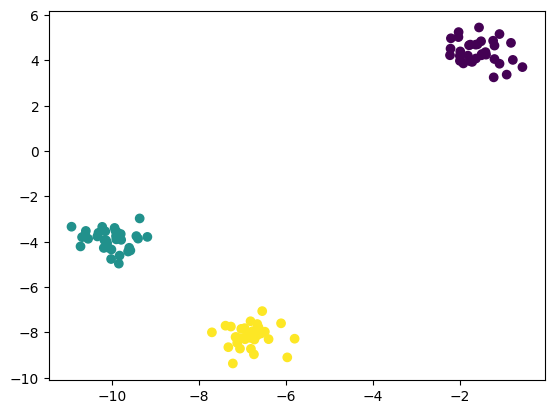

In [12]:
# 산점도를 출력합니다.
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

## 2.3 CSV 파일 적재

In [13]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://bit.ly/47Hl2t5'

# 데이터 적재
dataframe = pd.read_csv(url)

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


### 붙임

In [14]:
# 1~10번째 행을 건너 뛰고 한 행을 읽습니다.
dataframe = pd.read_csv(url, skiprows=range(1, 11), nrows=1)
dataframe

,integer,datetime,category
0,5,2015-01-01 00:00:10,0


## 2.4 엑셀 파일 적재

In [15]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://bit.ly/3V07wOm'

# 데이터 적재
dataframe = pd.read_excel(url, sheet_name=0, header=1)

# 처음 두 행을 확인합니다.
dataframe.head(2)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0


## 2.5 JSON 파일 적재하기

In [16]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://bit.ly/3IaJXer'

# 데이터 적재
dataframe = pd.read_json(url, orient='columns')

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


## 2.6 파케이 파일 적재하기

In [17]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://bit.ly/3SMBLFY'

# 데이터 적재
dataframe = pd.read_parquet(url)

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


## 2.7 아브로 파일 적재하기

In [18]:
# 라이브러리를 임포트합니다.
import requests
import pandavro as pdx

# 데이터 URL
url = 'https://bit.ly/42PLdx1'

# 파일을 다운로드합니다.
r = requests.get(url)
open('data.avro', 'wb').write(r.content)

# 데이터 적재
dataframe = pdx.read_avro('data.avro')

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


## 2.8 SQLite 데이터베이스로부터 적재하기

In [19]:
# 코랩에서 실행하는 경우 다음 주석을 제거하고 실행하세요.
!wget -q https://bit.ly/3UTVSoy -O sample.db

In [20]:
# 라이브러리를 임포트합니다.
import pandas as pd
from sqlalchemy import create_engine

# 데이터베이스에 연결합니다.
database_connection = create_engine('sqlite:///sample.db')

# 데이터를 적재합니다.
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

# 처음 두 개의 행을 확인합니다.
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


### 붙임

In [21]:
# 테이블의 전체 데이터를 가져 옵니다.
dataframe = pd.read_sql_table('data', database_connection)
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


## 2.9 원격 SQL 데이터베이스에 쿼리하기

In [22]:
# mysql을 설치하고 데이터를 로드한 다음 접속 권한을 설정합니다.
!apt-get -qq -y install mysql-server
!printf "[mysqld]\nsecure-file-priv = ''" >> /etc/alternatives/my.cnf
!service mysql start
!wget -q https://bit.ly/47Hl2t5 -O data.csv
!wget -q https://bit.ly/4c42MxF -O setup.sql
!mysql < 'setup.sql'

Preconfiguring packages ...
Selecting previously unselected package mysql-client-core-8.0.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../00-mysql-client-core-8.0_8.0.36-0ubuntu0.22.04.1_amd64.deb ...
Unpacking mysql-client-core-8.0 (8.0.36-0ubuntu0.22.04.1) ...
Selecting previously unselected package mysql-client-8.0.
Preparing to unpack .../01-mysql-client-8.0_8.0.36-0ubuntu0.22.04.1_amd64.deb ...
Unpacking mysql-client-8.0 (8.0.36-0ubuntu0.22.04.1) ...
Selecting previously unselected package libmecab2:amd64.
Preparing to unpack .../02-libmecab2_0.996-14build9_amd64.deb ...
Unpacking libmecab2:amd64 (0.996-14build9) ...
Selecting previously unselected package libprotobuf-lite23:amd64.
Preparing to unpack .../03-libprotobuf-lite23_3.12.4-1ubuntu7.22.04.1_amd64.deb ...
Unpacking libprotobuf-lite23:amd64 (3.12.4-1ubuntu7.22.04.1) ...
Selecting previously unselected package mysql-server-core-8.0.
Preparing to unpack .../04-mysql-server-co

In [23]:
# 라이브러리를 임포트합니다.
import pymysql
import pandas as pd

# 데이터베이스를 연결합니다.
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='root',
    db='db',
)

# 데이터프레임으로 데이터를 읽습니다.
dataframe = pd.read_sql("select * from data", conn)

# 처음 두 개의 행을 출력합니다.
dataframe.head(2)

<ipython-input-23-7e710944fb18>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql("select * from data", conn)


,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


## 2.10 구글 시트에서 데이터 적재하기

In [24]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 구글 시트를 CSV로 다운로드하는 URL
url = "https://bit.ly/3SQU24Y"

# CSV를 데이터프레임으로 읽스니다.
dataframe = pd.read_csv(url)

# 처음 두 개의 행을 출력합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 0:00:00,0
1,5,2015-01-01 0:00:01,0


## 2.12 비구조적인 데이터 적재하기

In [25]:
# 라이브러리를 임포트합니다.
import requests

# 텍스트 파일을 다운로드할 URL
txt_url = "https://bit.ly/3SVj6YI"

# 텍스트 파일을 다운로드합니다.
r = requests.get(txt_url)

# 로컬 text.txt 파일에 씁니다.
with open('text.txt', 'wb') as f:
    f.write(r.content)

# 파일을 읽습니다.
with open('text.txt', 'r') as f:
    text = f.read()

# 내용을 출력합니다.
print(text)

Hello there!
